In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df_train = pd.read_csv('data/train.csv')

train_size = df_train.shape[0]
print('Train Set Size: {} '.format(train_size))

df_test = pd.read_csv('data/test.csv')

test_size = df_test.shape[0]
print('Test Set Size: {} '.format(test_size))

df_train = pd.concat([df_train, df_test], sort=False)

Train Set Size: 1460 
Test Set Size: 1459 


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
df_train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

---

## Data Analysis

---

### 1 - EDA

The objective of this step is to know the data, the relations between the variables and the distributions of the features.

In [15]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [16]:
df_train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

#### 1.1 - Numeric Features

In [ ]:
numeric_features = df_train.select_dtypes(exclude=['object']).columns

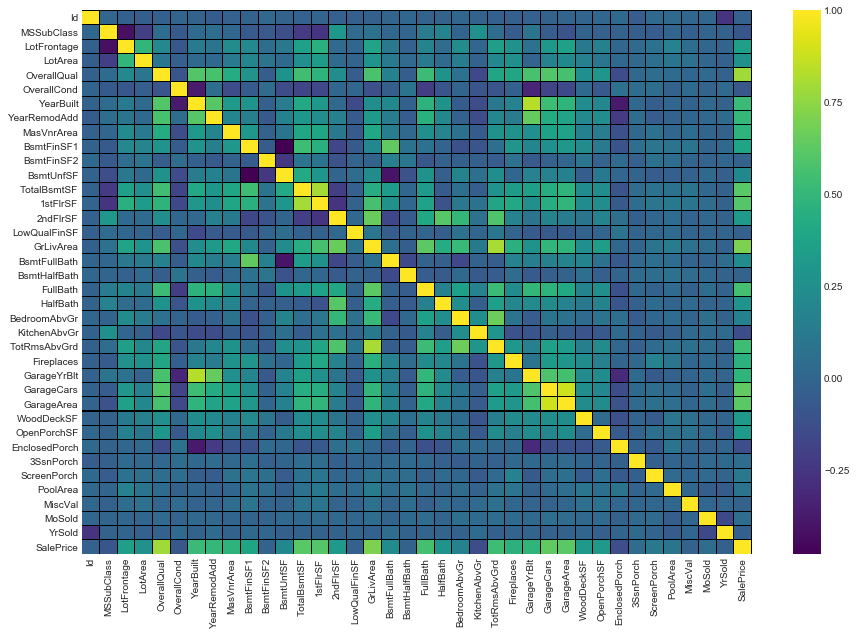

In [8]:
# Plot a heatmap to understand how the features are correlated with the target (SalePrice).
plt.figure(figsize=(15,10))
sns.heatmap(df_train[numeric_features].corr(), cmap='viridis', linewidths=.01, linecolor='black')

It seems that `OverallQual`, `GrLivArea`, `GarageCars` and some others are highly correlated with the `SalePrice`, wich makes total sense.

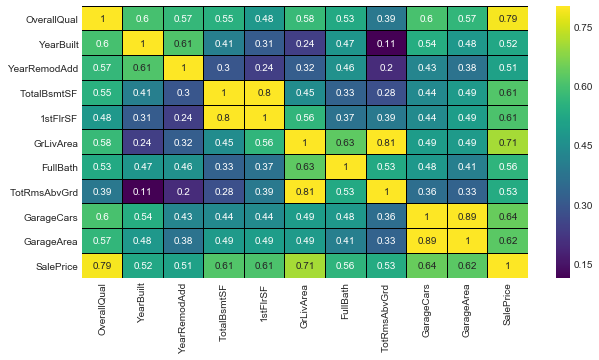

In [9]:
# Selecting the most correlated features with the Sale Price...(> 0.5)
price_correlation = df_train.corr()
price_correlation = price_correlation[price_correlation > 0.5]['SalePrice'].dropna()

# Plotting a simplified version of the heatmap for better understanding.
plt.figure(figsize=(10,5))
sns.heatmap(df_train[price_correlation.index].corr(), cmap='viridis', linewidths=.02, annot=True, linecolor='black', vmax=0.8)

- `OverallQual`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `GarageCars` and `GarageArea` are strongly correlated w/ `SalePrice`.
- `TotalBsmtSF` and `1stFlrSF` are strongly correlated.
- `GrLivArea` and `TotRmsAbvGrd` are strongly correlated.
- `GarageCars` and `GarageArea`are strongly correlated.

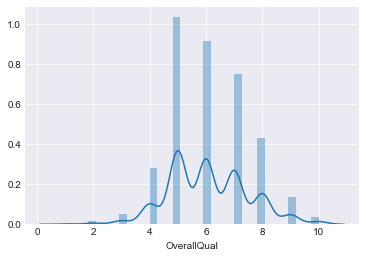

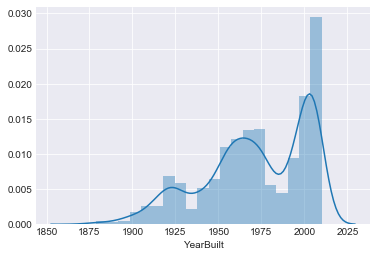

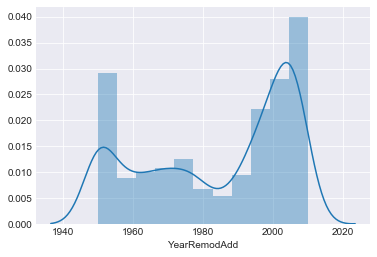

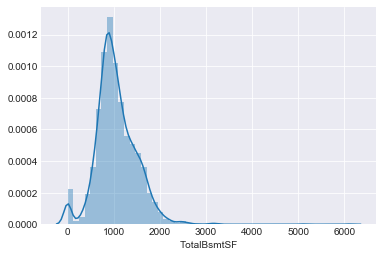

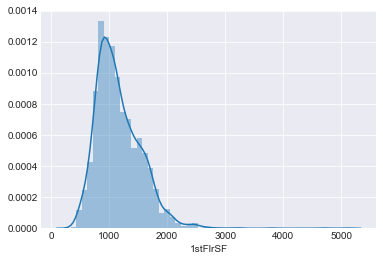

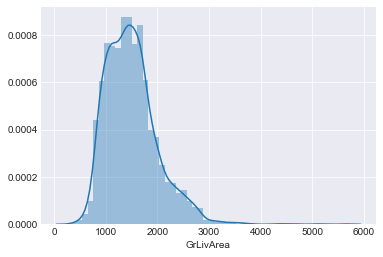

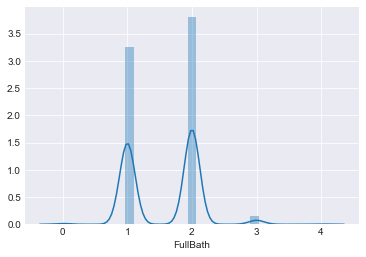

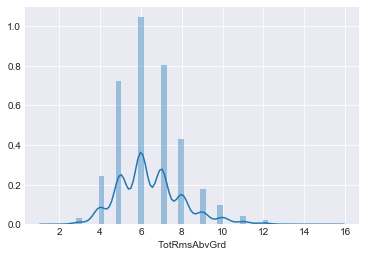

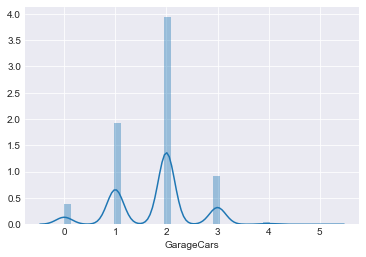

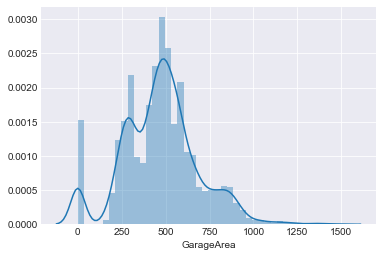

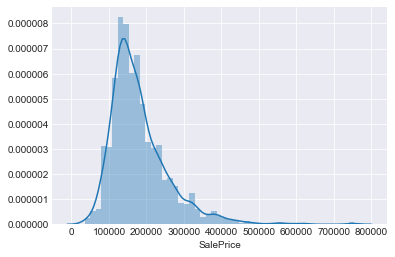

In [10]:
for feature in price_correlation.index:
    plt.figure()
    sns.distplot(df_train[feature].dropna())

- These features are not normally distributed - Maybe a transformation will be required.

#### 1.2 - Categorical Features

In [26]:
categorical_features = df_train.select_dtypes(include=['object']).columns

In [12]:
# Based on the data descrption, i will first split the categorical features in two groups: ordinal and nominal.
ordinal_features = ['GarageCond', 'GarageQual', 'GarageFinish', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'KitchenQual',
                    'ExterQual', 'ExterCond', 'HeatingQC']

nominal_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1',
                    'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
                    'FireplaceQu', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence',
                    'MiscFeature', 'SaleType', 'SaleCondition']

In [21]:
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=categorical_features)

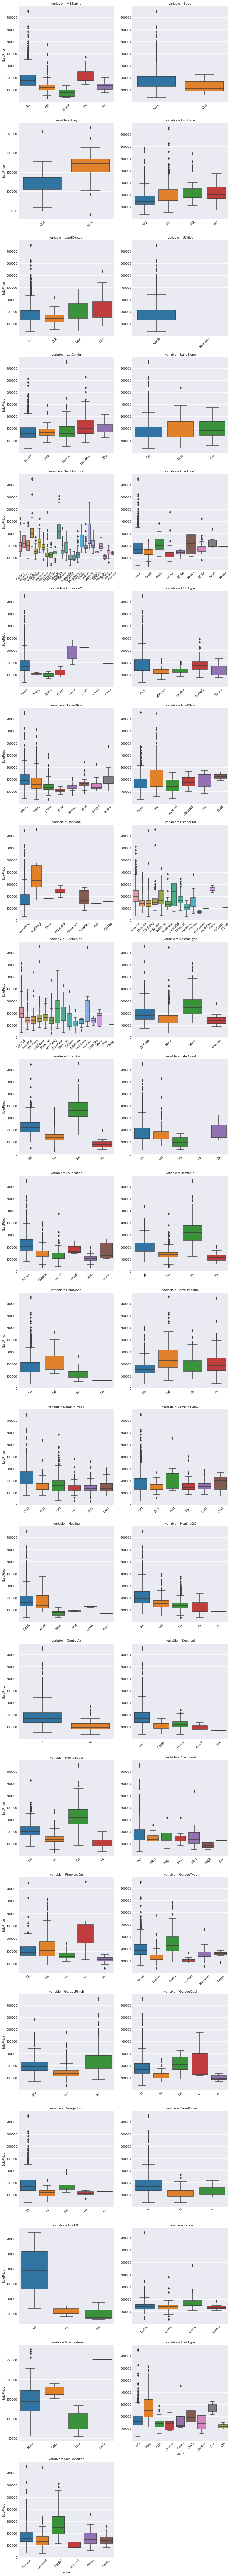

In [22]:
def bxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x = plt.xticks(rotation=45)
g = sns.FacetGrid(f, col='variable', col_wrap=2, size=5, sharex=False, sharey=False,)
g.map(bxplot, 'value', 'SalePrice')

- Since there are a lot of nominal features, with multiple categories, maybe it would be a good ideia to group some of he categories for dimensionality reduction.

#### 1.3 - Missing Values

The objective of this step is to find the features missing ratio. 
The ideia is to decide if the feature should be eliminated or if it's worth inputing values.

In [67]:
def missing_ratio():
    missing = (df_train.isnull().sum() / df_train.shape[0]) * 100
    df_nulls = pd.DataFrame(data={'Column': missing.index.values, 'Count': df_train.isnull().sum().values, 'Ratio': missing.values})
    df_nulls.sort_values(by='Ratio', ascending=False, inplace=True)
    return df_nulls

In [70]:
null_ratios = missing_ratio()
null_ratios[null_ratios['Count'] > 0]

Column  Count      Ratio
72        PoolQC   1453  99.520548
74   MiscFeature   1406  96.301370
6          Alley   1369  93.767123
73         Fence   1179  80.753425
57   FireplaceQu    690  47.260274
3    LotFrontage    259  17.739726
59   GarageYrBlt     81   5.547945
64    GarageCond     81   5.547945
58    GarageType     81   5.547945
60  GarageFinish     81   5.547945
63    GarageQual     81   5.547945
35  BsmtFinType2     38   2.602740
32  BsmtExposure     38   2.602740
30      BsmtQual     37   2.534247
31      BsmtCond     37   2.534247
33  BsmtFinType1     37   2.534247
26    MasVnrArea      8   0.547945
25    MasVnrType      8   0.547945
42    Electrical      1   0.068493

- `PoolQC`, `MiscFeature`, `Alley`, `Fence` and `FireplaceQu` have too many null values and can't be used in the model;
- `LotFrontage` is an important feature. Maybe it's worth trying to input the null values;
- The `GarageXXX` features have the same ratio because the same observations have all the null values;
- The same occurs with the `BsmtXXX` features;

In [108]:
df_train[df_train['GarageYrBlt'].isnull()][['GarageCond','GarageType','GarageFinish','GarageQual','GarageCars']]

GarageCond GarageType GarageFinish GarageQual  GarageCars
39          NaN        NaN          NaN        NaN           0
48          NaN        NaN          NaN        NaN           0
78          NaN        NaN          NaN        NaN           0
88          NaN        NaN          NaN        NaN           0
89          NaN        NaN          NaN        NaN           0
99          NaN        NaN          NaN        NaN           0
108         NaN        NaN          NaN        NaN           0
125         NaN        NaN          NaN        NaN           0
127         NaN        NaN          NaN        NaN           0
140         NaN        NaN          NaN        NaN           0
148         NaN        NaN          NaN        NaN           0
155         NaN        NaN          NaN        NaN           0
163         NaN        NaN          NaN        NaN           0
165         NaN        NaN          NaN        NaN           0
198         NaN        NaN          NaN        NaN           0
210         NaN        NaN          NaN        NaN           0
241         NaN        NaN          NaN        NaN           0
250         NaN        NaN          NaN        NaN           0
287         NaN        NaN          NaN        NaN           0
291         NaN        NaN          NaN        NaN           0
307         NaN        NaN          NaN        NaN           0
375         NaN        NaN          NaN        NaN           0
386         NaN        NaN          NaN        NaN           0
393         NaN        NaN          NaN        NaN           0
431         NaN        NaN          NaN        NaN           0
434         NaN        NaN          NaN        NaN           0
441         NaN        NaN          NaN        NaN           0
464         NaN        NaN          NaN        NaN           0
495         NaN        NaN          NaN        NaN           0
520         NaN        NaN          NaN        NaN           0
...         ...        ...          ...        ...         ...
954         NaN        NaN          NaN        NaN           0
960         NaN        NaN          NaN        NaN           0
968         NaN        NaN          NaN        NaN           0
970         NaN        NaN          NaN        NaN           0
976         NaN        NaN          NaN        NaN           0
1009        NaN        NaN          NaN        NaN           0
1011        NaN        NaN          NaN        NaN           0
1030        NaN        NaN          NaN        NaN           0
1038        NaN        NaN          NaN        NaN           0
1096        NaN        NaN          NaN        NaN           0
1123        NaN        NaN          NaN        NaN           0
1131        NaN        NaN          NaN        NaN           0
1137        NaN        NaN          NaN        NaN           0
1143        NaN        NaN          NaN        NaN           0
1173        NaN        NaN          NaN        NaN           0
1179        NaN        NaN          NaN        NaN           0
1218        NaN        NaN          NaN        NaN           0
1219        NaN        NaN          NaN        NaN           0
1234        NaN        NaN          NaN        NaN           0
1257        NaN        NaN          NaN        NaN           0
1283        NaN        NaN          NaN        NaN           0
1323        NaN        NaN          NaN        NaN           0
1325        NaN        NaN          NaN        NaN           0
1326        NaN        NaN          NaN        NaN           0
1337        NaN        NaN          NaN        NaN           0
1349        NaN        NaN          NaN        NaN           0
1407        NaN        NaN          NaN        NaN           0
1449        NaN        NaN          NaN        NaN           0
1450        NaN        NaN          NaN        NaN           0
1453        NaN        NaN          NaN        NaN           0

[81 rows x 5 columns]

In [ ]:
df_train[df_train['GarageYrBlt'].isnull()][['GarageCond','GarageType','GarageFinish','GarageQual']]

### Outlier Detection

The idea here is to plot some scatter plots in order to identify outliers.

In [ ]:
sns.jointplot(data=selected_features, x='OverallQual', y='SalePrice')

In [ ]:
sns.jointplot(data=selected_features, x='YearBuilt', y='SalePrice')

In [ ]:
sns.jointplot(data=selected_features, x='TotalBsmtSF', y='SalePrice')

In [ ]:
# This house seem to be an outlier because of its price and the TotalBsmtSF value. I'll remove it later.
selected_features[selected_features['TotalBsmtSF'] > 6000]

In [ ]:
sns.jointplot(data=selected_features, x='GrLivArea', y='SalePrice')

In [ ]:
# These two houses also seem to be outliers, so i'm also removing them.
selected_features[selected_features['GrLivArea'] > 4500]

In [ ]:
sns.jointplot(data=selected_features, x='FullBath', y='SalePrice')

In [ ]:
sns.jointplot(data=selected_features, x='GarageCars', y='SalePrice')

#### Removing Outliers

In [ ]:
selected_features.drop([523, 1298], inplace=True)

In [ ]:
sns.jointplot(data=selected_features, x='TotalBsmtSF', y='SalePrice')

In [ ]:
sns.jointplot(data=selected_features, x='GrLivArea', y='SalePrice')

## Feature Selection / Engineering

In [ ]:
# Checking correlations between the selected features to avoid multicolinearity.
#plt.figure(figsize=(15,10))
#sns.heatmap(selected_features.corr(), cmap='viridis', linewidths=.01, annot=True, vmax=0.8)

In [ ]:
#Removing highly correlated features

# TotalBsmtSF and 1stFlrSF - Keeping TotalBsmtSF
#selected_features.drop('1stFlrSF', axis=1, inplace=True)
# GrLivArea and TotRmsAbvGrd - Keeping GrLivArea because of higher correlation with SalePrice.
#selected_features.drop('TotRmsAbvGrd', axis=1, inplace=True)
# GarageCars and GarageArea - Keeping GarageCars because of higher correlation with SalePrice.
#selected_features.drop('GarageArea', axis=1, inplace=True)

In [ ]:
ord_values = {'GarageCond' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'GarageQual' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
              'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
              'BsmtCond' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'BsmtQual' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'ExterQual':  {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}}

dummy = 'GarageType', 'MSZoning', 'Exterior1st', 'PavedDrive','LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Foundation', 'Street', 'CentralAir',

## Model And Validation

## Submission